In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
ds = pd.read_csv("adult.csv")
ds.replace('?', np.nan, inplace=True)
ds.dropna(inplace=True)

In [15]:
x=ds.iloc[:,:-1].values
y=ds.iloc[:,-1].values

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
x_train[:, 1:]=imputer.fit_transform(x_train[:,1:]) 

In [18]:
from sklearn.preprocessing import LabelEncoder

ordinal_categorical_columns = [1, 3, 5, 6, 7, 8, 9, 13]

label_encoders = []
for col_index in ordinal_categorical_columns:
    le = LabelEncoder()
    x_train[:, col_index] = le.fit_transform(x_train[:, col_index])
    x_test[:, col_index] = le.transform(x_test[:, col_index])
    label_encoders.append(le)


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # or StandardScaler
x_train_StandardScaled = scaler.fit_transform(x_train)
x_test_StandardScaled = scaler.transform(x_test)


In [20]:
from sklearn.preprocessing import LabelEncoder
lb_obj= LabelEncoder() 
y_train=lb_obj.fit_transform(y_train)
y_test=lb_obj.transform(y_test)

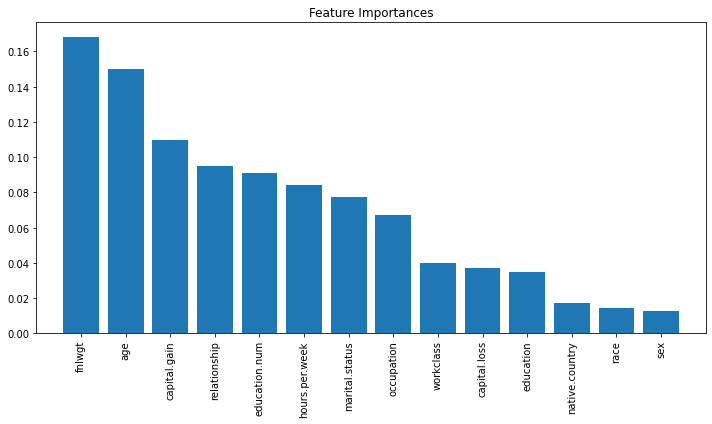

In [21]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train_StandardScaled, y_train)
feature_importances = model.feature_importances_
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(x_train_StandardScaled.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(x_train_StandardScaled.shape[1]), ds.columns[:-1][indices], rotation=90)
plt.xlim([-1, x_train_StandardScaled.shape[1]])
plt.tight_layout()
plt.show()


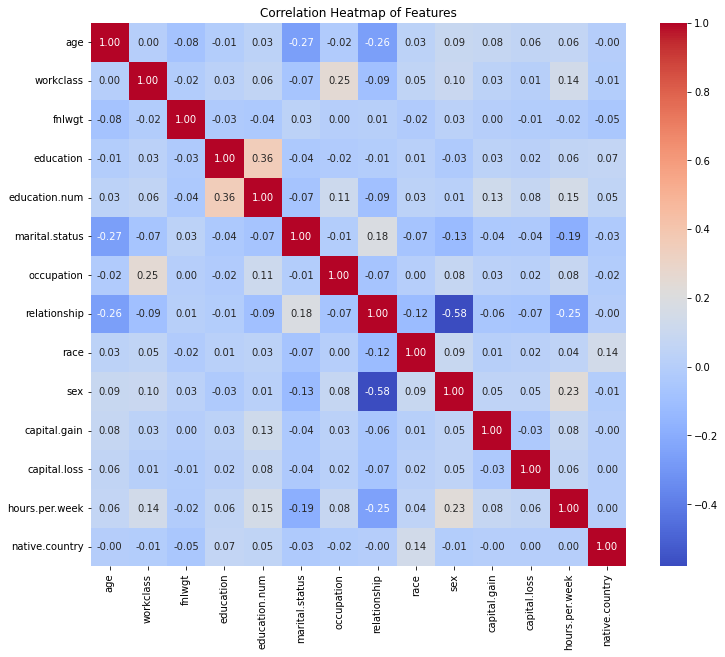

In [22]:
import seaborn as sns
x_train_df = pd.DataFrame(x_train_StandardScaled, columns=ds.columns[:-1])
correlation_matrix = x_train_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()


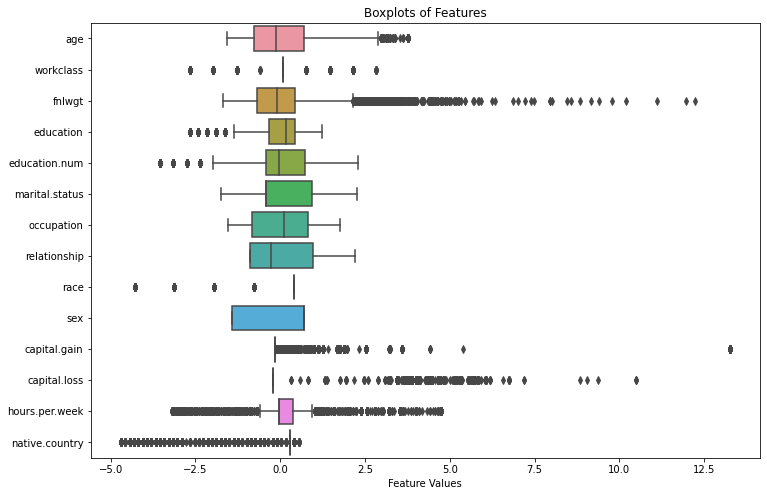

In [23]:
import seaborn as sns
x_train_df = pd.DataFrame(x_train_StandardScaled, columns=ds.columns[:-1])
plt.figure(figsize=(12, 8))
sns.boxplot(data=x_train_df, orient='h')
plt.title('Boxplots of Features')
plt.xlabel('Feature Values')
plt.show()


<Figure size 864x576 with 0 Axes>

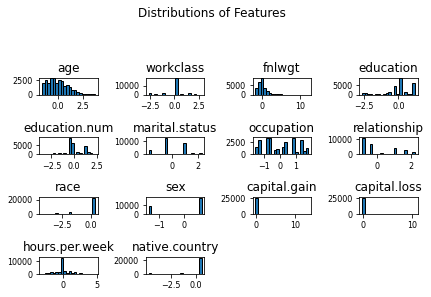

In [24]:
x_train_df = pd.DataFrame(x_train_StandardScaled, columns=ds.columns[:-1])
plt.figure(figsize=(12, 8))
x_train_df.hist(bins=20, edgecolor='black', grid=False, xlabelsize=8, ylabelsize=8)
plt.suptitle('Distributions of Features', x=0.5, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()